Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Linear Regression

In [47]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :
          
        self.learning_rate = learning_rate
          
        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # initiating the weight and bias
          
        self.w = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y


        # implementing Gradient Descent for Optimization
                  
        for i in range( self.no_of_iterations ) :
              
            self.update_weights()
              
        
      
    # function to update weights in gradient descent
      
   def update_weights( self ,) :
             
        Y_prediction = self.predict( self.X )
          
        # calculate gradients  
      
        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m
       
        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m 
          
        # updating the weights
      
        self.w = self.w - self.learning_rate * dw
      
        self.b = self.b - self.learning_rate * db
          
      
    # Line function for prediction:
      
   def predict( self, X ) :
      
        return X.dot( self.w ) + self.b


Using Linear Regression model for Prediction

In [48]:
# importing the dependencies
import  numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocesssing


In [49]:
salary_data = pd.read_csv("/Users/tushark/Downloads/CSV/salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [50]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [51]:
salary_data.shape

(30, 2)

In [52]:
# checking missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Spilitting features and target

In [53]:
X =salary_data.iloc[:,:-1].values
Y= salary_data.iloc[:,1].values

In [54]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [55]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

Training the Linear Regression model

In [57]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=1000)

In [58]:
model.fit(X_train, Y_train)

In [59]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9570.888860991548
bias =  24384.029598697263


y = 9514(x) + 23697

salary = 9514(experience) + 23697

Predict the salary value for test data

In [60]:
test_data_prediction = model.predict(X_test)

In [61]:
print(test_data_prediction)

[36826.18511799 34912.00734579 67453.02947316 59796.31838437
 92337.34051174 81809.36276465]


Visualizing the predicted values & actual Values

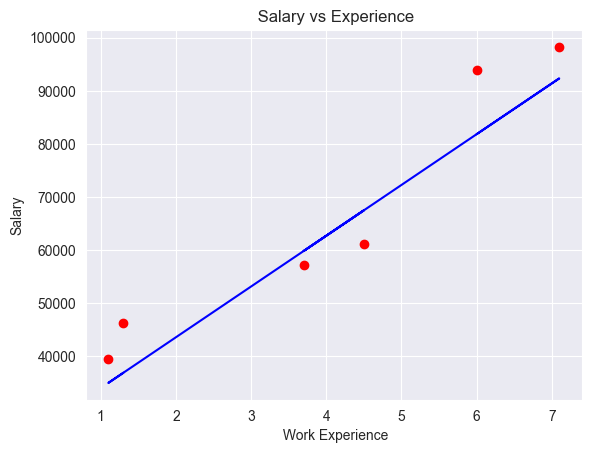

In [62]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()